In [1]:
# Read me: 
"""
This Notebook uses 'yellow_tripdata_2015-01.csv' dataset which 
represent real taxi calls over manhetten recorded for january 2015

This notebook extracts the needed data for our DARP problem.
in the form of 'nyc2015_clean_sim.csv' containing only 
request ID , pick_up_time , src_ID and dest _ID. (node ID's are subjected to
G = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive'))
"""


"\nThis Notebook uses 'yellow_tripdata_2015-01.csv' dataset which \nrepresent real taxi calls over manhetten recorded for january 2015\n\nThis notebook extracts the needed data for our DARP problem.\nin the form of 'nyc2015_clean_sim.csv' containing only \nrequest ID , pick_up_time , src_ID and dest _ID. (node ID's are subjected to\nG = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive'))\n"

In [1]:
import pandas as pd
import collections
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta


In [2]:
# Making request from real nyc taxi data , for Simulation

In [4]:
# Getting the Data
df2015 = pd.read_csv('yellow_tripdata_2015-01.csv')
# Sorting by pickupo time
df2015 = df2015.sort_values(by=['tpep_pickup_datetime'])
print(df2015.head())

FileNotFoundError: [Errno 2] No such file or directory: 'yellow_tripdata_2015-01.csv'

<class 'networkx.classes.multidigraph.MultiDiGraph'>


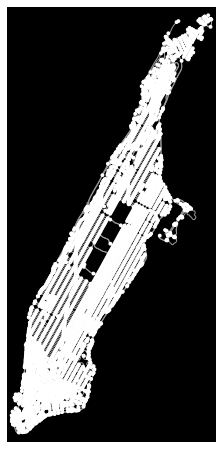

In [23]:
# New York map for processing
G = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive')
print(type(G))
fig, ax = ox.plot_graph(G, node_zorder=2, node_color='w', bgcolor='k')

In [24]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
# Adding df2015['src'] & df['dst']
# get the nearest network nodes to two points
df2015['src'] = ox.distance.nearest_nodes(G, df2015['pickup_longitude'], df2015['pickup_latitude']) # Pellers House 
df2015['dst'] = ox.distance.nearest_nodes(G, df2015['dropoff_longitude'], df2015['dropoff_latitude'])

In [28]:
# east central park 40.77655043495452, -73.96272394118272
# west central park 40.78309602235116, -73.97788139435836
# north central park 40.802499781294784, -73.94938768615549
# south central park 40.76541447387158, -73.97977213369425
# South manhatan 40.74039135810914, -73.99471104354681
# North manhatan 40.82760269509603, -73.9459039945126

"""
park_src1 = ox.distance.nearest_nodes(G, 40.77655043495452, -73.96272394118272)
park_src2 = ox.distance.nearest_nodes(G, 40.78309602235116, -73.97788139435836)
park_src3 = ox.distance.nearest_nodes(G, 40.802499781294784, -73.94938768615549)
park_src4 = ox.distance.nearest_nodes(G, 40.76541447387158, -73.97977213369425)
park_src5 = ox.distance.nearest_nodes(G, 40.74039135810914, -73.99471104354681)
park_src6 = ox.distance.nearest_nodes(G, 40.82760269509603, -73.9459039945126)"""

park_src1 = ox.distance.nearest_nodes(G,-73.96272394118272, 40.77655043495452 )
park_src2 = ox.distance.nearest_nodes(G,-73.97788139435836, 40.78309602235116)
park_src3 = ox.distance.nearest_nodes(G, -73.94938768615549, 40.802499781294784)
park_src4 = ox.distance.nearest_nodes(G, -73.97977213369425,40.76541447387158)
park_src5 = ox.distance.nearest_nodes(G,-73.99471104354681, 40.74039135810914)
park_src6 = ox.distance.nearest_nodes(G, -73.9459039945126, 40.82760269509603)

print(park_src1)
print(park_src2)
print(park_src3)
print(park_src4)
print(park_src5)
print(park_src6)

42446021
42442463
3099327950
42440022
42430263
42434340


In [27]:
df2015.head()

NameError: name 'df2015' is not defined

In [ ]:
# Drop unwanted columns
df2015=df2015.drop(columns=['RateCodeID', 'store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','passenger_count','trip_distance','passenger_count','trip_distance'])
#df2015=df2015.drop(columns=['passenger_count','trip_distance'])

In [ ]:
# Drops rows with bad data (bad ccordinates)

df2 = df2015[df2015.pickup_longitude != 0]
df2 = df2015[df2015.pickup_latitude != 0]
df2 = df2015[df2015.dropoff_longitude != 0]
df2 = df2015[df2015.dropoff_latitude != 0]

In [ ]:
print("shape of df2")
print(df2.shape)
print("shape of df2015")
print(df2015.shape)
df2.head()


In [ ]:
# Make CSV of df2
#df2.to_csv('nyc2015_full_sim.csv')


In [ ]:
#df3=pd.read_csv('nyc2015_full_sim.csv')

In [ ]:
df2.head()

In [ ]:
# To clear the data just to ID , pick_upo_time , src ID and dest ID

df2=df2.drop(columns=[ 'VendorID','tpep_dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','tpep_pickup_datetime2'])

In [ ]:
# Make CSV of df2
#df2.to_csv('nyc2015_clean_sim.csv')


In [11]:
df4=pd.read_csv('nyc2015_clean_sim.csv')

df4.head()

In [12]:
df4.head()

,Unnamed: 0,tpep_pickup_datetime,src,dst
0,0,2015-01-01 00:00:00,42448338,2298803428
1,1,2015-01-01 00:00:00,1692433938,42436055
2,2,2015-01-01 00:00:01,2298803471,2298803471
3,3,2015-01-01 00:00:03,42438894,42432706
4,4,2015-01-01 00:00:03,1815133244,42435275


In [16]:
epoch_len = timedelta(seconds = 30)
start_time = str_to_time(df4['tpep_pickup_datetime'][0])
for index, row in df4.iterrows():
    time = str_to_time(row['tpep_pickup_datetime'])
    if time <= (start_time+epoch_len) :
        print('true')
    else:
        print('flase')

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
f

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flase
flas

KeyboardInterrupt: 

In [9]:
 df4['tpep_pickup_datetime'][0]

'2015-01-01 00:00:00'

In [10]:
def str_to_time(s):
    t = pd.Timestamp(s)
    return t.to_pydatetime()
    
    

In [22]:
str_to_time(df4['tpep_pickup_datetime'][0])

datetime.datetime(2015, 1, 1, 0, 0)